In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

## __PREPARING THE DATASET__

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from keras.utils import array_to_img
import keras.backend as K
from keras.layers import Input, Conv2D, MaxPooling2D, Activations, BatchNormalization, Conv2DTranspose, Add
from keras.models import Model

In [ ]:
dataset, info = tfds.load("oxford_iiit_pet:3.*.*", with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/3680 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteCW35D3/oxford_iiit_pet-train.tfrecord*...:…

Generating test examples...:   0%|          | 0/3669 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteCW35D3/oxford_iiit_pet-test.tfrecord*...: …

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


In [ ]:
info

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    full_name='oxford_iiit_pet/3.2.0',
    description="""
    The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
    images for each class. The images have large variations in scale, pose and
    lighting. All images have an associated ground truth annotation of breed.
    """,
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    data_path=PosixGPath('/tmp/tmp2x_n7hdmtfds'),
    file_format=tfrecord,
    download_size=773.52 MiB,
    dataset_size=774.69 MiB,
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=string),
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=uint8),
        'species': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        

In [ ]:
# Train ve test kümelerindeki toplam örnek sayısına bakalım.

print("Train kümesindeki toplam örnek sayısı: ", len(dataset["train"]))
print("Test kümesindeki toplam örnek sayısı: ", len(dataset["test"]))

Train kümesindeki toplam örnek sayısı:  3680
Test kümesindeki toplam örnek sayısı:  3669


In [ ]:
for image in dataset["train"].take(1): 
  print(image)

{'file_name': <tf.Tensor: shape=(), dtype=string, numpy=b'Sphynx_158.jpg'>, 'image': <tf.Tensor: shape=(500, 500, 3), dtype=uint8, numpy=
array([[[ 3,  3,  3],
        [ 5,  3,  4],
        [ 7,  5,  6],
        ...,
        [ 3,  1,  2],
        [ 3,  1,  2],
        [ 3,  1,  2]],

       [[ 4,  3,  1],
        [ 5,  3,  4],
        [ 5,  3,  4],
        ...,
        [ 6,  2,  3],
        [ 7,  3,  4],
        [ 8,  4,  5]],

       [[ 4,  3,  1],
        [ 5,  4,  2],
        [ 5,  3,  4],
        ...,
        [ 7,  3,  2],
        [ 8,  4,  3],
        [ 8,  4,  3]],

       ...,

       [[ 6, 10, 11],
        [ 6,  7,  9],
        [ 7,  8, 10],
        ...,
        [ 3,  4,  6],
        [ 3,  4,  6],
        [ 4,  5,  7]],

       [[ 8, 12, 13],
        [ 7,  8, 10],
        [ 8,  9, 11],
        ...,
        [ 4,  5,  9],
        [ 4,  5,  7],
        [ 4,  5,  7]],

       [[ 8, 12, 13],
        [ 7,  8, 10],
        [ 8,  9, 11],
        ...,
        [ 5,  6, 10],
        [ 5, 

In [ ]:
image.keys()

dict_keys(['file_name', 'image', 'label', 'segmentation_mask', 'species'])

In [ ]:
image["species"].numpy()

0

In [ ]:
image["image"].numpy() # içerisinde resmi temsil eden matris bulunur.

array([[[ 3,  3,  3],
        [ 5,  3,  4],
        [ 7,  5,  6],
        ...,
        [ 3,  1,  2],
        [ 3,  1,  2],
        [ 3,  1,  2]],

       [[ 4,  3,  1],
        [ 5,  3,  4],
        [ 5,  3,  4],
        ...,
        [ 6,  2,  3],
        [ 7,  3,  4],
        [ 8,  4,  5]],

       [[ 4,  3,  1],
        [ 5,  4,  2],
        [ 5,  3,  4],
        ...,
        [ 7,  3,  2],
        [ 8,  4,  3],
        [ 8,  4,  3]],

       ...,

       [[ 6, 10, 11],
        [ 6,  7,  9],
        [ 7,  8, 10],
        ...,
        [ 3,  4,  6],
        [ 3,  4,  6],
        [ 4,  5,  7]],

       [[ 8, 12, 13],
        [ 7,  8, 10],
        [ 8,  9, 11],
        ...,
        [ 4,  5,  9],
        [ 4,  5,  7],
        [ 4,  5,  7]],

       [[ 8, 12, 13],
        [ 7,  8, 10],
        [ 8,  9, 11],
        ...,
        [ 5,  6, 10],
        [ 5,  6, 10],
        [ 5,  6, 10]]], dtype=uint8)

In [ ]:
image["segmentation_mask"].numpy() # içerisinde segmentation değerlerinden oluşan matris bulunur.

array([[[2],
        [2],
        [2],
        ...,
        [2],
        [2],
        [2]],

       [[2],
        [2],
        [2],
        ...,
        [2],
        [2],
        [2]],

       [[2],
        [2],
        [2],
        ...,
        [2],
        [2],
        [2]],

       ...,

       [[2],
        [2],
        [2],
        ...,
        [2],
        [2],
        [2]],

       [[2],
        [2],
        [2],
        ...,
        [2],
        [2],
        [2]],

       [[2],
        [2],
        [2],
        ...,
        [2],
        [2],
        [2]]], dtype=uint8)

In [ ]:
np.min(image["segmentation_mask"].numpy())

1

In [ ]:
np.max(image["segmentation_mask"].numpy())

3

In [ ]:
label_names = ["Abyssinian", "american_bulldog", "american_pit_bull_terrier", "basset_hound", "beagle", "Bengal", "Birman", "Bombay", "boxer", "British_Shorthair", "chihuahua", "Egyptian_Mau", "english_cocker_spaniel", "english_setter", "german_shorthaired", "great_pyrenees", "havanese", "japanese_chin", "keeshond", "leonberger", "Maine_Coon", "miniature_pinscher", "newfoundland", "Persian", "pomeranian", "pug", "Ragdoll", "Russian_Blue", "saint_bernard", "samoyed", "scottish_terrier", "shiba_inu", "Siamese", "Sphynx", "staffordshire_bull_terrier", "wheaten_terrier", "yorkshire_terrier"]

In [ ]:
def value_counts_for_train_and_test(ds): # train ya da test veri setini içerisine paratmetre olarak alır.
  temp=[]

  for img in ds:
    label = (img["label"].numpy())
    temp.append(label_names[label])

  df = pd.DataFrame(temp, columns=["labels_of_images"])

  return df

In [ ]:
df_train = value_counts_for_train_and_test(dataset["train"])
print("Number of different breeds of animals: {}\n\nValue counts for train\n\n{}\n\nNumber of animals in train set: {}".format(len(df_train["labels_of_images"].value_counts()), df_train["labels_of_images"].value_counts(), len(df_train)))

Number of different breeds of animals: 37

Value counts for train

Sphynx                        100
miniature_pinscher            100
samoyed                       100
english_setter                100
scottish_terrier              100
staffordshire_bull_terrier    100
havanese                      100
Maine_Coon                    100
leonberger                    100
Russian_Blue                  100
shiba_inu                     100
keeshond                      100
Ragdoll                       100
Persian                       100
pomeranian                    100
beagle                        100
great_pyrenees                100
boxer                         100
saint_bernard                 100
chihuahua                     100
British_Shorthair             100
american_pit_bull_terrier     100
yorkshire_terrier             100
Bengal                        100
Birman                        100
pug                           100
wheaten_terrier               100
german_shorthai

In [ ]:
df_test = value_counts_for_train_and_test(dataset["test"])
print("Number of different breeds of animals: {}\n\nValue counts for test\n\n{}\n\nNumber of animals in test set: {}".format(len(df_test["labels_of_images"].value_counts()), df_test["labels_of_images"].value_counts(), len(df_test)))

Number of different breeds of animals: 37

Value counts for test

leonberger                    100
american_bulldog              100
wheaten_terrier               100
Russian_Blue                  100
Ragdoll                       100
german_shorthaired            100
english_cocker_spaniel        100
British_Shorthair             100
japanese_chin                 100
miniature_pinscher            100
Sphynx                        100
Siamese                       100
pug                           100
english_setter                100
pomeranian                    100
Maine_Coon                    100
Persian                       100
havanese                      100
samoyed                       100
saint_bernard                 100
beagle                        100
newfoundland                  100
yorkshire_terrier             100
basset_hound                  100
Bengal                        100
great_pyrenees                100
chihuahua                     100
shiba_inu       

In [ ]:
len(dataset["train"])

3680

In [ ]:
# SPLİT TRAIN DATASET INTO TRAIN AND VALIDATION SETS

DATASET_SIZE = len(dataset["train"])
train_size = int(0.7 * DATASET_SIZE)

train_set = dataset["train"].take(train_size)
validation_set = dataset["train"].skip(train_size)

In [ ]:
print(len(train_set))
print(len(validation_set))

2576
1104


In [ ]:
train_set_value_counts = value_counts_for_train_and_test(train_set)
print(train_set_value_counts.value_counts())

labels_of_images          
boxer                         79
american_pit_bull_terrier     78
german_shorthaired            76
Maine_Coon                    76
Bombay                        75
staffordshire_bull_terrier    74
beagle                        74
pomeranian                    73
great_pyrenees                73
Bengal                        73
miniature_pinscher            72
english_cocker_spaniel        72
Birman                        72
leonberger                    72
newfoundland                  71
Russian_Blue                  70
Ragdoll                       70
chihuahua                     70
Persian                       70
english_setter                70
British_Shorthair             70
keeshond                      70
basset_hound                  69
japanese_chin                 69
shiba_inu                     68
pug                           67
yorkshire_terrier             67
american_bulldog              67
Egyptian_Mau                  67
havanese        

In [ ]:
test_set_value_counts = value_counts_for_train_and_test(validation_set)
print(test_set_value_counts.value_counts())

labels_of_images          
scottish_terrier              45
wheaten_terrier               39
samoyed                       37
Siamese                       36
Sphynx                        36
Abyssinian                    35
saint_bernard                 35
havanese                      34
pug                           33
american_bulldog              33
yorkshire_terrier             33
shiba_inu                     32
basset_hound                  31
japanese_chin                 31
Russian_Blue                  30
english_setter                30
British_Shorthair             30
Ragdoll                       30
Persian                       30
keeshond                      30
chihuahua                     30
Birman                        28
leonberger                    28
miniature_pinscher            28
pomeranian                    27
Bengal                        27
great_pyrenees                27
beagle                        26
staffordshire_bull_terrier    26
Egyptian_Mau    

In [ ]:
width = 128
height = 128

# Train ve validation setini yüklemek için fonksiyon.
def load_datasets(dataset):
  img = tf.image.resize(dataset["image"], size=(width, height))
  mask = tf.image.resize(dataset["segmentation_mask"], size=(width, height))
  
  img = tf.cast(img, dtype=tf.float32) / 255.0 # Normalization
  mask -= 1 # Bunun nedeni segmentation classlarının değerlerini [1,2,3] şeklinde belirlemişler. Onu [0,1,2] şekline getirmektir.

  return img, mask

In [ ]:
train = train_set.map(load_datasets, num_parallel_calls=tf.data.AUTOTUNE) # data.AUTOTUNE çalışma zamanı değerini dinamik olarak ayarlar. 
validation = validation_set.map(load_datasets, num_parallel_calls=tf.data.AUTOTUNE) 
test = dataset["test"].map(load_datasets, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
print("Train size: {}\nValidation size: {}\nTest size: {}".format(len(train), len(validation), len(test)))

Train size: 2576
Validation size: 1104
Test size: 3669


In [ ]:
BUFFER_SIZE=1000
BATCH_SIZE=64
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

validation_dataset = validation.batch(BATCH_SIZE)
test_dataset = test.batch(BATCH_SIZE)

In [ ]:
def display_images(display_list):
  plt.figure(figsize = (12, 12))
  title = ["Input Image", "Ground Truth", "Prediction"]

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(array_to_img(display_list[i]))
    plt.axis("off")
  
  plt.show()

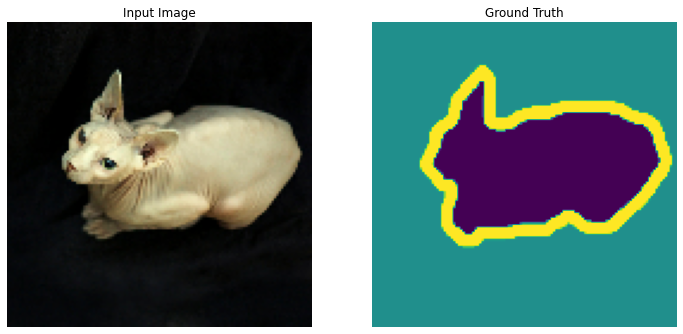

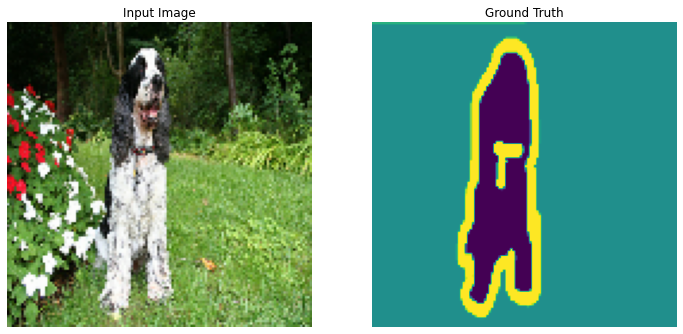

In [ ]:
for img, mask in train.take(2):
  sample_image, sample_mask = img, mask
  display_list = sample_image, sample_mask

  display_images(display_list)

## __EVALUATION METRICS__

In [ ]:
def plot_acc_loss(history):
    fig, ax = plt.subplots(1, 3, figsize=(24, 8))

    ax[0].plot(history.epoch, history.history["accuracy"], "b")
    ax[0].plot(history.epoch, history.history["val_accuracy"], "r")
    ax[0].legend(["train_acc", "val_acc"], loc="upper left")
    ax[0].title.set_text("Accuracy")

    ax[1].plot(history.epoch, history.history["loss"], "b")
    ax[1].plot(history.epoch, history.history["val_loss"], "r")
    ax[1].legend(["train_loss", "val_loss"], loc="upper left")
    ax[1].title.set_text("Loss")

    ax[2].plot(history.epoch, history.history["dice_coef"], "b")
    ax[2].plot(history.epoch, history.history["val_dice_coef"], "r")
    ax[2].legend(["dice_coef", "val_dice_coef"], loc="upper left")
    ax[2].title.set_text("Dice coefficient")

    plt.show()

In [ ]:
def dice_coef(gt, pred, smooth=1e-7):
    gt_f = K.flatten(K.one_hot(K.cast(gt, "int32"), num_classes=3)[...,1:])
    pred_f = K.flatten(pred[...,1:])

    intersect = K.sum(gt_f * pred_f, axis=-1)
    union = K.sum(gt_f + pred_f, axis=-1)

    return K.mean((2. * intersect / (union + smooth)))

## __MODELS__

In [ ]:
def input_l(input_shape):
    x = Conv2D(64, (7,7), 2, padding="same")(input_shape)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = MaxPooling2D((3,3), 2, padding="same")(x)

    return x

def encoder_block(input_tensor, n):
    
    x = Conv2D(n, (1,1), 2, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    res1 = Activation("relu")(x)

    x = Conv2D(n, (3,3), 2, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(n, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    add1 = Add()([x,res1])

    res2 = Activation("relu")(add1)

    x = Conv2D(n, (3, 3), padding="same")(add1)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    
    x = Conv2D(n, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    add2 = Add()([x,res2])

    x = Activation("relu")(add2)

    return x

def decoder_block(input_tensor, m, n):
    x = Conv2D(m//4, (1, 1), padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2DTranspose(m//4, (3, 3), 2, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(n, (1, 1), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x
    
def output_l(input_tensor, number_of_classes):
    x = Conv2DTranspose(32, (3, 3), 2, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(32, (3,3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2DTranspose(number_of_classes, (2, 2), 2, padding="same")(x)
    x = Activation("softmax")(x)

    return x

def linkNet_1(input_shape, number_of_classes):

    inputs = Input(shape=input_shape)
    
    input_ = input_l(inputs)

    encoder_1 = encoder_block(input_, 64)
    encoder_2 = encoder_block(encoder_1, 128)
    encoder_3 = encoder_block(encoder_2, 256)
    encoder_4 = encoder_block(encoder_3, 512)

    decoder_4 = decoder_block(encoder_4, m=512, n=256)
    decoder_3_input = Add()([decoder_4, encoder_3])

    decoder_3 = decoder_block(decoder_3_input, m=256, n=128)
    decoder_2_input = Add()([decoder_3, encoder_2])

    decoder_2 = decoder_block(decoder_2_input, m=128, n=64)
    decoder_1_input = Add()([decoder_2, encoder_1])

    decoder_1 = decoder_block(decoder_1_input, m=64, n=64)
    
    outputs = output_l(decoder_1, number_of_classes)

    model = Model(inputs=inputs, outputs=outputs)
    
    return model

In [ ]:
input_shape = (128,128,3)

model_1 = linkNet_1(input_shape, 3)
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   9472        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [ ]:
model_1.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
              metrics=["accuracy", dice_coef])

In [ ]:
TRAIN_LENGTH = len(train)
STEPS_PER_EPOCH = TRAIN_LENGTH / BATCH_SIZE
EPOCHS = 20

history_1 = model_1.fit(train_dataset,
                        epochs=EPOCHS,
                        steps_per_epoch=STEPS_PER_EPOCH,
                        validation_data=validation_dataset)

Epoch 1/20
40/40 [==============================] - 29s 350ms/step - loss: 0.8371 - accuracy: 0.6388 - dice_coef: 0.5110 - val_loss: 1.0626 - val_accuracy: 0.3313 - val_dice_coef: 0.3462
Epoch 2/20
40/40 [==============================] - 13s 340ms/step - loss: 0.6127 - accuracy: 0.7613 - dice_coef: 0.6671 - val_loss: 1.2491 - val_accuracy: 0.3260 - val_dice_coef: 0.2737
Epoch 3/20
40/40 [==============================] - 14s 341ms/step - loss: 0.5421 - accuracy: 0.7802 - dice_coef: 0.7114 - val_loss: 1.4403 - val_accuracy: 0.3613 - val_dice_coef: 0.2527
Epoch 4/20
40/40 [==============================] - 13s 340ms/step - loss: 0.4999 - accuracy: 0.7938 - dice_coef: 0.7360 - val_loss: 1.3570 - val_accuracy: 0.4293 - val_dice_coef: 0.3205
Epoch 5/20
40/40 [==============================] - 14s 341ms/step - loss: 0.4625 - accuracy: 0.8081 - dice_coef: 0.7526 - val_loss: 1.7283 - val_accuracy: 0.3655 - val_dice_coef: 0.2319
Epoch 6/20
40/40 [==============================] - 14s 341ms/ste

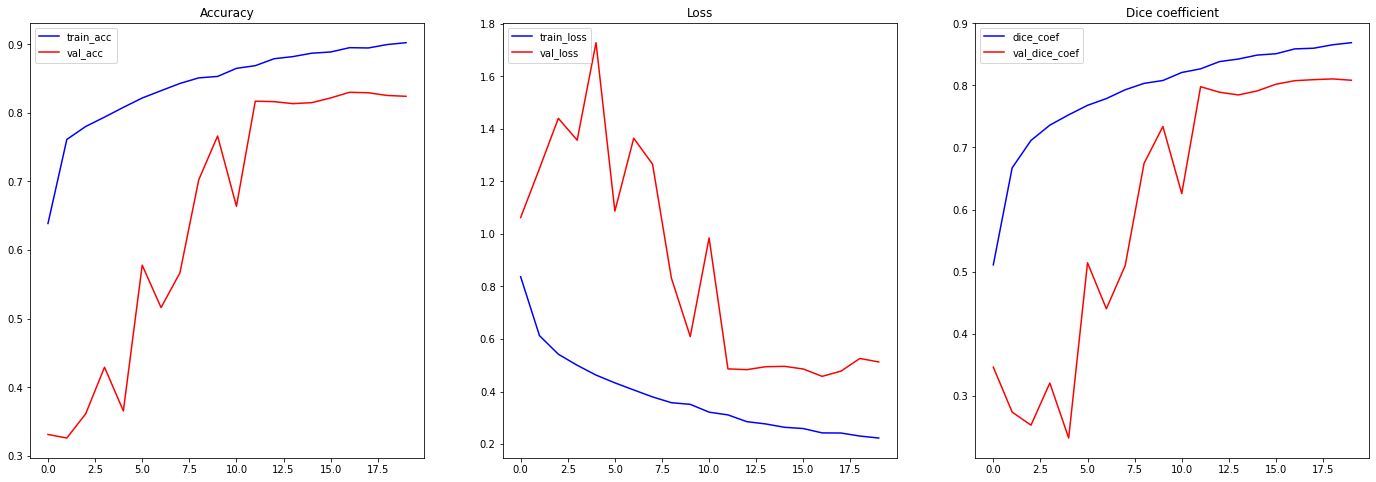

In [ ]:
plot_acc_loss(history_1)

In [ ]:
def input_l_2(input_shape):
    x = Conv2D(64, (7,7), 2, padding="same")(input_shape)
    x = BatchNormalization()(x)
    x = Activation("elu")(x)

    x = MaxPooling2D((3,3), 2, padding="same")(x)

    return x

def encoder_block_2(input_tensor, n):
    
    x = Conv2D(n, (1,1), 2, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    res1 = Activation("elu")(x)

    x = Conv2D(n, (3,3), 2, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("elu")(x)

    x = Conv2D(n, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    add1 = Add()([x,res1])

    res2 = Activation("elu")(add1)

    x = Conv2D(n, (3, 3), padding="same")(add1)
    x = BatchNormalization()(x)
    x = Activation("elu")(x)
    
    x = Conv2D(n, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    add2 = Add()([x,res2])

    x = Activation("elu")(add2)

    return x

def decoder_block_2(input_tensor, m, n):
    x = Conv2D(m//4, (1, 1), padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("elu")(x)

    x = Conv2DTranspose(m//4, (3, 3), 2, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("elu")(x)

    x = Conv2D(n, (1, 1), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("elu")(x)

    return x
    
def output_l_2(input_tensor, number_of_classes):
    x = Conv2DTranspose(32, (3, 3), 2, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("elu")(x)

    x = Conv2D(32, (3,3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("elu")(x)

    x = Conv2DTranspose(number_of_classes, (2, 2), 2, padding="same")(x)
    x = Activation("softmax")(x)

    return x

def linkNet_2(input_shape, number_of_classes):

    inputs = Input(shape=input_shape)
    
    input_ = input_l_2(inputs)

    encoder_1 = encoder_block_2(input_, 64)
    encoder_2 = encoder_block_2(encoder_1, 128)
    encoder_3 = encoder_block_2(encoder_2, 256)
    encoder_4 = encoder_block_2(encoder_3, 512)

    decoder_4 = decoder_block_2(encoder_4, m=512, n=256)
    decoder_3_input = Add()([decoder_4, encoder_3])

    decoder_3 = decoder_block_2(decoder_3_input, m=256, n=128)
    decoder_2_input = Add()([decoder_3, encoder_2])

    decoder_2 = decoder_block_2(decoder_2_input, m=128, n=64)
    decoder_1_input = Add()([decoder_2, encoder_1])

    decoder_1 = decoder_block_2(decoder_1_input, m=64, n=64)
    
    outputs = output_l_2(decoder_1, number_of_classes)

    model = Model(inputs=inputs, outputs=outputs)
    
    return model

In [ ]:
input_shape = (128,128,3)

model_2 = linkNet_2(input_shape, 3)

In [ ]:
model_2.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
              metrics=["accuracy", dice_coef])

In [ ]:
history_2 = model_2.fit(train_dataset,
                        epochs=EPOCHS,
                        steps_per_epoch=STEPS_PER_EPOCH,
                        validation_data=validation_dataset)

Epoch 1/20
40/40 [==============================] - 15s 279ms/step - loss: 0.8077 - accuracy: 0.6777 - dice_coef: 0.5307 - val_loss: 1.7908 - val_accuracy: 0.4109 - val_dice_coef: 0.2321
Epoch 2/20
40/40 [==============================] - 10s 263ms/step - loss: 0.6126 - accuracy: 0.7639 - dice_coef: 0.6607 - val_loss: 1.2925 - val_accuracy: 0.4266 - val_dice_coef: 0.3103
Epoch 3/20
40/40 [==============================] - 14s 344ms/step - loss: 0.5414 - accuracy: 0.7845 - dice_coef: 0.7084 - val_loss: 1.1081 - val_accuracy: 0.4942 - val_dice_coef: 0.3902
Epoch 4/20
40/40 [==============================] - 11s 266ms/step - loss: 0.5153 - accuracy: 0.7912 - dice_coef: 0.7256 - val_loss: 0.9776 - val_accuracy: 0.5789 - val_dice_coef: 0.4834
Epoch 5/20
40/40 [==============================] - 10s 264ms/step - loss: 0.4712 - accuracy: 0.8074 - dice_coef: 0.7491 - val_loss: 0.8659 - val_accuracy: 0.6256 - val_dice_coef: 0.5440
Epoch 6/20
40/40 [==============================] - 10s 264ms/ste

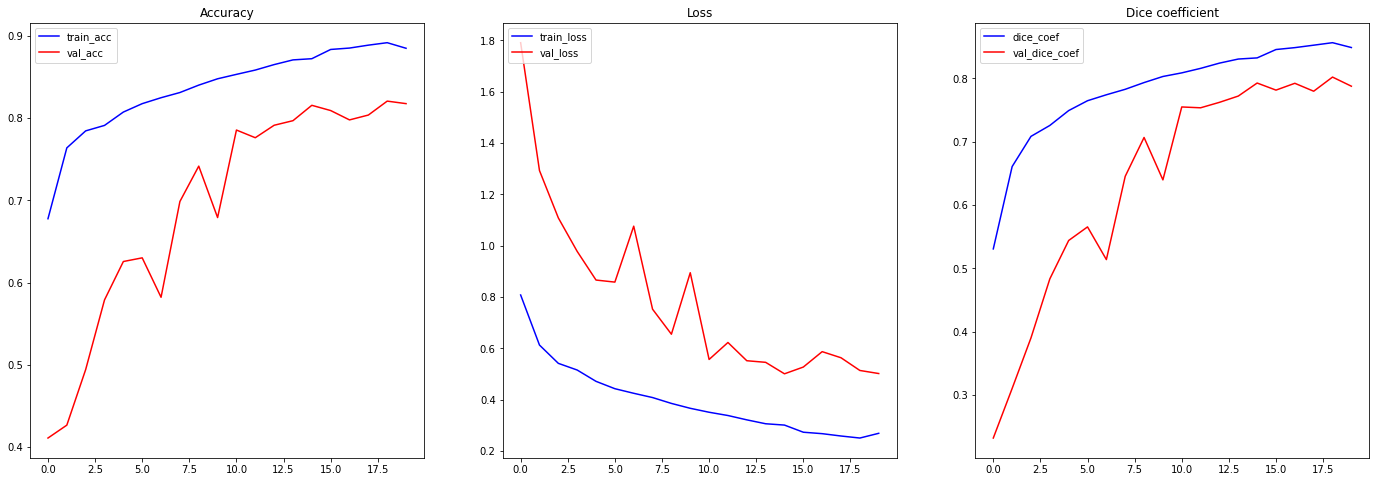

In [ ]:
plot_acc_loss(history_2)

In [ ]:
width = 256
height = 256

train = train_set.map(load_datasets, num_parallel_calls=tf.data.AUTOTUNE) # data.AUTOTUNE çalışma zamanı değerini dinamik olarak ayarlar. 
validation = validation_set.map(load_datasets, num_parallel_calls=tf.data.AUTOTUNE) 
test = dataset["test"].map(load_datasets, num_parallel_calls=tf.data.AUTOTUNE)

BUFFER_SIZE=1000
BATCH_SIZE=64
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

validation_dataset = validation.batch(BATCH_SIZE)
test_dataset = test.batch(BATCH_SIZE)

In [ ]:
input_shape = (256,256,3)

model_3 = linkNet_1(input_shape, 3)

In [ ]:
model_3.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
              metrics=["accuracy", dice_coef])

In [ ]:
history_3 = model_3.fit(train_dataset,
                        epochs=EPOCHS,
                        steps_per_epoch=STEPS_PER_EPOCH,
                        validation_data=validation_dataset)

Epoch 1/20
40/40 [==============================] - 33s 585ms/step - loss: 0.8271 - accuracy: 0.6676 - dice_coef: 0.5040 - val_loss: 0.9189 - val_accuracy: 0.6564 - val_dice_coef: 0.4436
Epoch 2/20
40/40 [==============================] - 18s 457ms/step - loss: 0.5778 - accuracy: 0.7720 - dice_coef: 0.6745 - val_loss: 0.8804 - val_accuracy: 0.5813 - val_dice_coef: 0.5043
Epoch 3/20
40/40 [==============================] - 18s 459ms/step - loss: 0.5094 - accuracy: 0.7915 - dice_coef: 0.7251 - val_loss: 0.8838 - val_accuracy: 0.6150 - val_dice_coef: 0.5030
Epoch 4/20
40/40 [==============================] - 18s 459ms/step - loss: 0.4527 - accuracy: 0.8155 - dice_coef: 0.7553 - val_loss: 0.8522 - val_accuracy: 0.6143 - val_dice_coef: 0.5255
Epoch 5/20
40/40 [==============================] - 21s 517ms/step - loss: 0.4174 - accuracy: 0.8298 - dice_coef: 0.7750 - val_loss: 0.6189 - val_accuracy: 0.7395 - val_dice_coef: 0.6660
Epoch 6/20
40/40 [==============================] - 21s 516ms/ste

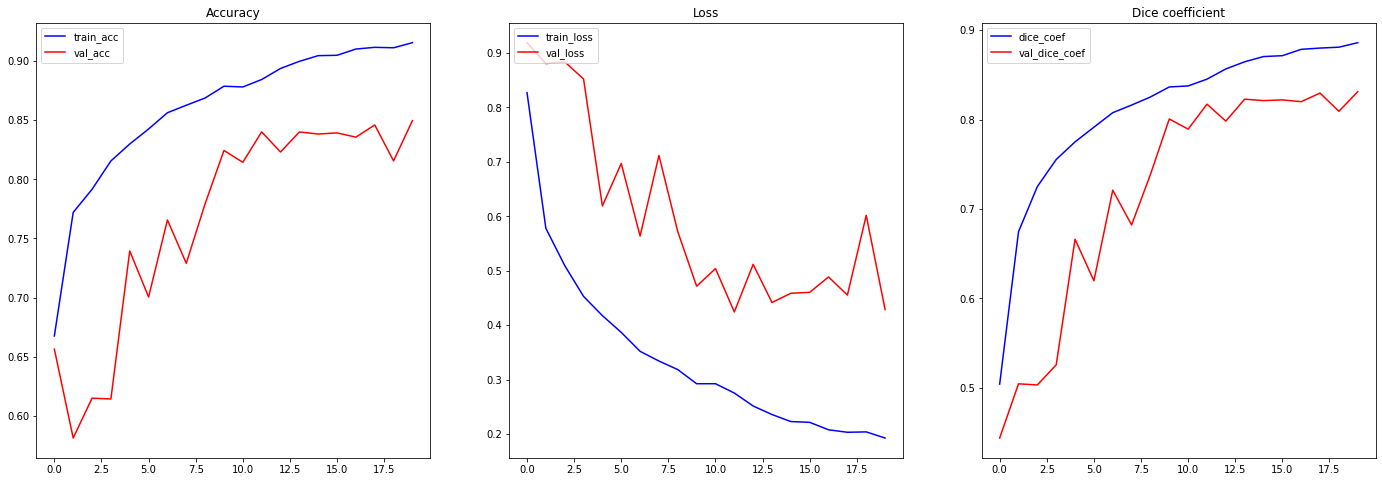

In [ ]:
plot_acc_loss(history_3)

In [ ]:
model_3.save("segmentation_model.h5")

## __TEST__

In [ ]:
test_metrics = model_3.evaluate(test_dataset, verbose=0)
print("Test accuracy: ", test_metrics[1])

Test accuracy:  0.8532429337501526


1/1 [==============================] - 1s 915ms/step


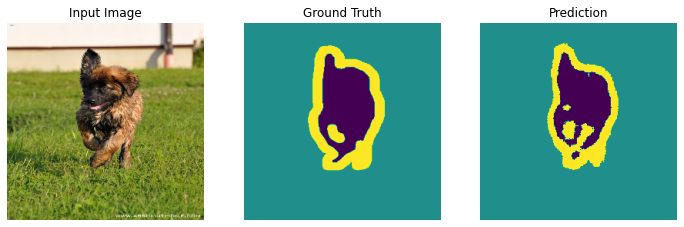

1/1 [==============================] - 0s 22ms/step


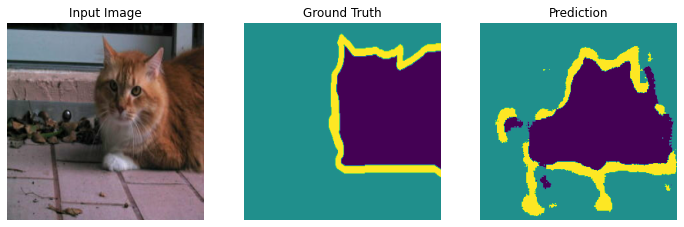

1/1 [==============================] - 0s 20ms/step


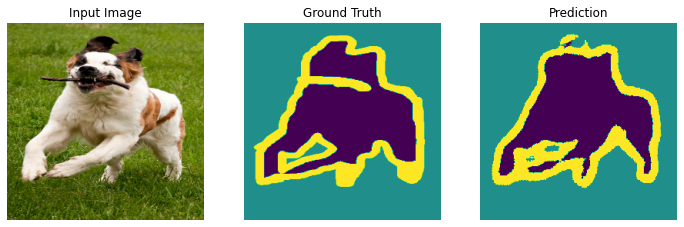

1/1 [==============================] - 0s 19ms/step


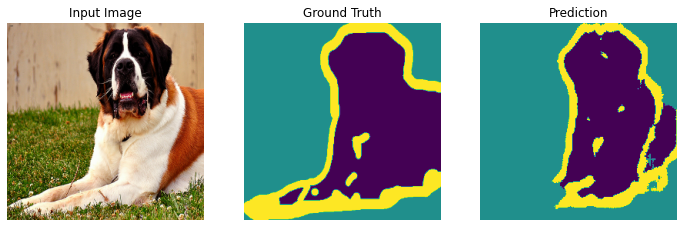

1/1 [==============================] - 0s 19ms/step


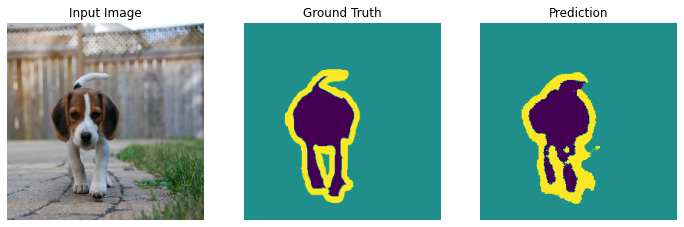

In [ ]:
def create_mask(pred_mask):
  pred_mask = tf.math.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  
  return pred_mask[0]


def show_predictions(dataset=None, num=5):
    for image, mask in test.take(num):
        display_images([image, mask, create_mask(model_3.predict(image[tf.newaxis, ...]))])
 
show_predictions()